# Star catalogue analysis
This activity analyzes properties of over 100,000 stars. 

To get started,
- First, click the disc icon at the top to save the notebook. That makes it easier to start over later if you need to.
- Go to the menu bar above and select **Kernel > Restart & Run All**.
- You won't hurt anything by experimenting. If you break it, go to **File > Revert to checkpoint** to start over.
- Is this your first time? Need a refresher? Try the 5-minute [Intro to Jupyter activity](./Intro_to_Jupyter.ipynb) and come back here. 

When you're ready, scroll down to **Part One**.

In [1]:
# Import modules that contain functions we need
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Read in data that will be used for the calculations.
data = pd.read_csv("https://github.com/adamlamee/CODINGinK12-data/raw/master/stars.csv")

In [3]:
# We wish too look at the first 5 rows of our data set
data.head(5)

,proper,ra,dec,dist,mag,absmag,ci,temp,x,y,z,con,lum,var,var_min,var_max
0,Sol,0.000000,0.000000,0.0000,-26.70,4.850,0.656,5756.588113,0.000005,0.000000,0.000000,NaN,1.000000,NaN,NaN,NaN
1,Proxima Centauri,14.495985,-62.679485,1.2959,11.01,15.447,1.807,3383.441193,-0.472264,-0.361451,-1.151219,Cen,0.000058,V645,11.079,10.939
2,Rigil Kentaurus,14.660765,-60.833976,1.3248,-0.01,4.379,0.710,5567.728737,-0.495203,-0.414084,-1.156625,Cen,1.543121,NaN,0.113,-0.087
3,NaN,14.660346,-60.838300,1.3248,1.35,5.739,0.900,4996.415833,-0.495181,-0.413973,-1.156674,Cen,0.440961,NaN,NaN,NaN
4,Barnard's Star,17.963472,4.693388,1.8238,9.54,13.235,1.570,3691.168543,-0.017373,-1.816613,0.149123,Oph,0.000443,V2500,9.590,9.490


In [4]:
# The .shape command displays the (number of rows , number of columns) in a file.
data.shape

(119614, 16)

## Part One
Let's get acquainted with this data set. Look at the cells above to find the answers to the following questions:
- In the table above, what do you think each of the column headings represent?
- How many stars are included in this data set?

When you're ready, scroll down to **Part Two**.

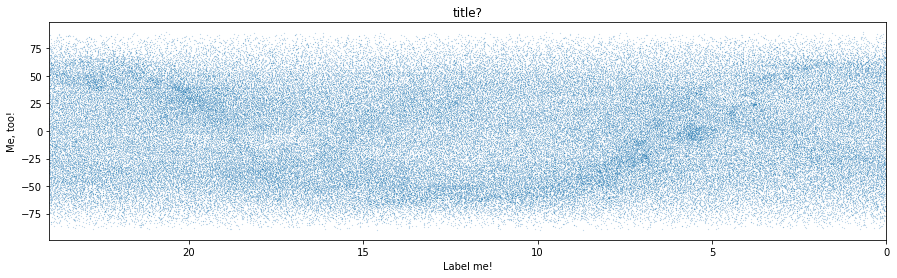

In [5]:
fig = plt.figure(figsize=(15, 4))
plt.scatter(data.ra,data.dec, s=0.01)
plt.xlim(24, 0)
plt.title("title?")
plt.xlabel('Label me!')
plt.ylabel('Me, too!')

## Part Two
The code above generates a graph of declination vs. right ascension for each star in the data table.
- The title and axis labels on the graph could use some work. Try editing the code above the graph, then run the code again to see the changes.
- What pattern do you see in the graph? What might explain that pattern?

When you're ready, scroll down to **Part Three**.

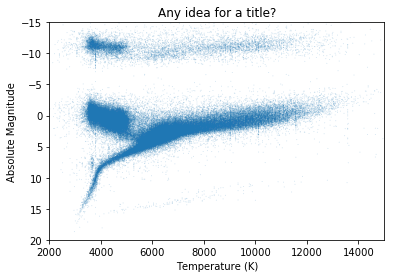

In [6]:
# format the points on the graph
transparency = 0.2
size = 1

# draws a scatter plot
plt.scatter(data.temp, data.absmag, s=size, edgecolors='none', alpha=transparency)
plt.xlim(2000,15000)
plt.ylim(20,-15)
plt.title("Any idea for a title?")
plt.ylabel("Absolute Magnitude")
plt.xlabel("Temperature (K)")

## Part Three
Use the graph above to answer the following questions:
- What patterns do you see in the graph?
- The y-axis shows brighter stars at the top and dimmer stars toward the bottom. What's strange about the **absolute magnitude** scale?
- Some stars aren't very hot, but they're very bright because they're so big (called *giants* and *super giants*). Where are those on the graph?
- Other stars are really bright, even though they're small (called *white dwarfs*). How could that happen? Where might you find them on the graph?

When you're ready, scroll down to **Part Four**.

In [7]:
# These are the abbreviations for all the constellations
data.sort_values('con').con.unique()

array(['And', 'Ant', 'Aps', 'Aql', 'Aqr', 'Ara', 'Ari', 'Aur', 'Boo',
       'CMa', 'CMi', 'CVn', 'Cae', 'Cam', 'Cap', 'Car', 'Cas', 'Cen',
       'Cep', 'Cet', 'Cha', 'Cir', 'Cnc', 'Col', 'Com', 'CrA', 'CrB',
       'Crt', 'Cru', 'Crv', 'Cyg', 'Del', 'Dor', 'Dra', 'Equ', 'Eri',
       'For', 'Gem', 'Gru', 'Her', 'Hor', 'Hya', 'Hyi', 'Ind', 'LMi',
       'Lac', 'Leo', 'Lep', 'Lib', 'Lup', 'Lyn', 'Lyr', 'Men', 'Mic',
       'Mon', 'Mus', 'Nor', 'Oct', 'Oph', 'Ori', 'Pav', 'Peg', 'Per',
       'Phe', 'Pic', 'PsA', 'Psc', 'Pup', 'Pyx', 'Ret', 'Scl', 'Sco',
       'Sct', 'Ser', 'Sex', 'Sge', 'Sgr', 'Tau', 'Tel', 'TrA', 'Tri',
       'Tuc', 'UMa', 'UMi', 'Vel', 'Vir', 'Vol', 'Vul', nan], dtype=object)

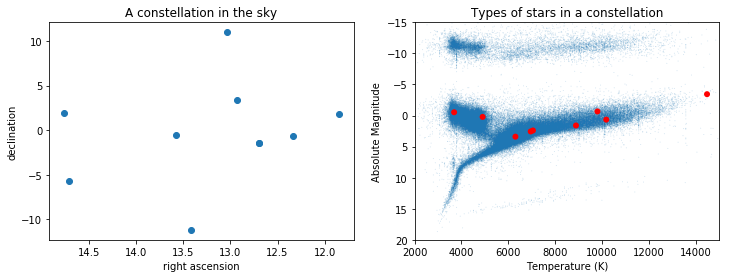

In [8]:
# This shows just one constellation
constellation = data.query('con == "Vir"')

plt.close('all')
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

# This plots where the constellation's 10 brightest stars are in the sky
constellation = constellation.sort_values('mag').head(10)
plt.scatter(constellation.ra,constellation.dec)
plt.gca().invert_xaxis()
plt.title("A constellation in the sky")
plt.xlabel('right ascension')
plt.ylabel('declination')

plt.subplot(1, 2, 2)
# format the points on the graph
transparency = 0.2
size = 1

# plots the constellation's stars in red over the big graph of all stars
plt.scatter(data.temp, data.absmag, s=size, edgecolors='none', alpha=transparency)
plt.scatter(constellation.temp, constellation.absmag, color='red', edgecolors='none')
plt.xlim(2000,15000)
plt.ylim(20,-15)
plt.title("Types of stars in a constellation")
plt.ylabel("Absolute Magnitude")
plt.xlabel("Temperature (K)")
plt.show()

## Part Four
The left graph above shows what the constellation **Virgo** looks like in the sky. The graph on the right shows those same stars (as red points) on the same brightness vs. temperature graph in part two.
- Using the graphic below, which types of stars are in Virgo?
- The code above shows the abbreviation for each constellation, then lets you filter the data set for just the stars in that constellation (called a *query*). Try plotting a different constellation. Is it made of different types of stars?

![](https://github.com/adamlamee/CODINGinK12-data/raw/master/H-R-diagram.jpeg)

---
## Saving Your Work
This is running on a Google Compute Engine server on a distant planet and deletes what you've done after 20 minutes of inactivity. To save for later use or analysis you have a few options:
- File > Download as > ipynb (to continue your analysis later)
- File > Download as > pdf (static copy including code and graphs)
- Right-click on a graph and select Save Image As ... (to share a pic)

## Credits

The data came from [The Astronomy Nexus](http://www.astronexus.com/hyg) and their colletion of the Hipparcos, Yale Bright Star, and Gliese catalogues ([huge zip file here](http://www.astronexus.com/files/downloads/hygdata_v3.csv.gz)). The handy reversed H-R diagram is from [The Electric Universe](http://www.holoscience.com/wp/twinkle-twinkle-electric-star/). UCF physics undergraduate Tyler Townsend, who located the data and began the analysis, was funded by Seminole County Schools to make scientific computing a standard part of every middle school science class. The Mily Way scatterplot was added by [Quarknet](https://quarknet.i2u2.org/) Fellow and high school teacher Jeremy Smith, Baltimore, MD. This notebook was designed by Adam LaMee, who coordinated its development as the [PhysTEC](https://www.phystec.org/) Teacher-in-residence in the [University of Central Florida's Physics department](https://sciences.ucf.edu/physics/). Find more activities and license info at [CODINGinK12.org](http://www.codingink12.org). Finally, thanks to the great folks at [MyBinder.org](https://beta.mybinder.org/) this notebook is interactive without you needing to download it or install Jupyter on your own device.